In [78]:
import tempfile
from pylab import *
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
import os
import pydub
import scipy
import scipy.io.wavfile
%matplotlib inline
plt.rc("figure",facecolor="w",figsize=(16,2))

In [91]:
mp3 = pydub.AudioSegment.from_mp3('/Users/zihengchen/Desktop/jay.mp3')
mp3 = mp3[66500:76500]
mp3.export('/Users/zihengchen/Desktop/jay.wav', format="wav")

samplerate, data = scipy.io.wavfile.read('/Users/zihengchen/Desktop/jay.wav')
data = data[:,0]/2**15

In [92]:
mp3

In [93]:
time = np.arange(0.0, data.size, 1.0) / samplerate

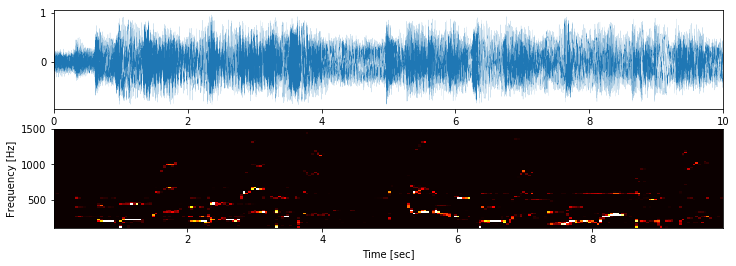

In [97]:
plt.figure(figsize=(12,4))

plt.subplot(2,1,1)
plt.plot(time,data,alpha=1,lw=0.1)
plt.xlim(0,time.max())

plt.subplot(2,1,2)
f, t, Sxx = signal.spectrogram(data, samplerate, nperseg=2048)

#thd = Sxx<1e-4
#Sxx[thd] = np.zeros_like(Sxx)[thd]

plt.pcolormesh(t, f, Sxx,vmin=1e-4,vmax=1e-3,cmap='hot')
plt.ylabel('Frequency [Hz]')
#plt.yscale('log')
plt.ylim(100,1500)
plt.xlabel('Time [sec]')

plt.savefig('/Users/zihengchen/Desktop/z.png',dpi=300)

(100, 10000)

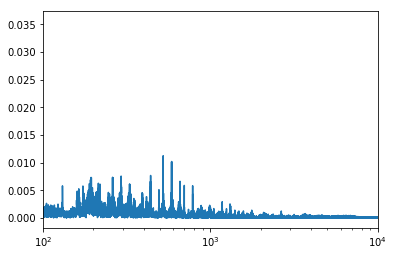

In [95]:
from scipy.fftpack import fft, fftfreq, fftshift
plt.figure(figsize=(6,4))

N,T = data.size, 1/samplerate
freq    = fftshift(fftfreq(N, T))
fourier = fftshift(fft(data))
fourier = fourier[freq>=0]
freq    = freq[freq>=0]

fourier = np.abs(fourier)
fourier = fourier/N

plt.plot(freq,fourier)
plt.xscale('log')
plt.xlim(100,10000)

#plt.ylim(0,100)

In [12]:
log10(1e-4)

-4.0